## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
loan_data_preprocessed_backup = pd.read_csv('loan_data_2007_2014_preprocessed.csv')

In [142]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()

## Bird Eye View

In [143]:
loan_data_preprocessed.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,0,0,0,0,0,0,0,1,0,1
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,0,0,0,0,0,0,1,0,0
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,0,0,0,0,0,0,1,0,1
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,0,0,0,0,0,0,1,0,1
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,0,0,0,0,0,0,1,0,1


In [144]:
loan_data_preprocessed['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [145]:
#Keeping only those data which are defaulted and had enough time to repay
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(
    ['Charged Off', 'Does not meet the credit policy. Status:Charged Off']
)]

In [146]:
loan_data_defaults.shape

(43236, 209)

In [147]:
pd.options.display.max_rows = None

In [148]:
loan_data_defaults.isnull().sum()

Unnamed: 0.1                                                           0
Unnamed: 0                                                             0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
emp_length                                         

In [149]:
#Incorporating conservatism, hence filling with 0
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)
loan_data_defaults['mths_since_last_record'].fillna(0, inplace = True)

In [150]:
loan_data_defaults['mths_since_last_delinq'].isnull().sum()

0

#### Dependent variable

In [151]:
#funded_amnt : total amount that was lost the moment borrower defaulted

In [152]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']

In [153]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

In [154]:
#We need to cap the value at 1 and flooring is not required since minimum is 0

In [155]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1,
                                              loan_data_defaults['recovery_rate'])
#doing it if data changes
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0,
                                              loan_data_defaults['recovery_rate'])

In [156]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: recovery_rate, dtype: float64

In [157]:
#EAD

In [158]:
#Total recovered principal : reflects the total payments made on the principal of loan

In [159]:
loan_data_defaults['CCF'] = (
    loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']
) / (
    loan_data_defaults['funded_amnt']
)

In [160]:
loan_data_defaults['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

In [161]:
loan_data_defaults.to_csv('loan_data_defaults.csv')

In [162]:
#Visulization

(array([2.1023e+04, 1.8370e+03, 3.8730e+03, 1.3940e+03, 2.1330e+03,
        3.3440e+03, 4.7650e+03, 1.7130e+03, 1.1790e+03, 4.0600e+02,
        3.4100e+02, 2.7400e+02, 1.1700e+02, 9.3000e+01, 8.1000e+01,
        7.3000e+01, 5.4000e+01, 7.2000e+01, 5.7000e+01, 3.0000e+01,
        4.7000e+01, 2.7000e+01, 1.7000e+01, 1.5000e+01, 2.0000e+01,
        2.3000e+01, 1.7000e+01, 7.0000e+00, 1.1000e+01, 7.0000e+00,
        8.0000e+00, 7.0000e+00, 7.0000e+00, 8.0000e+00, 7.0000e+00,
        1.0000e+01, 6.0000e+00, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00, 9.0000e+00,
        9.0000e+00, 1.5000e+01, 8.0000e+00, 9.0000e+00, 3.3000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

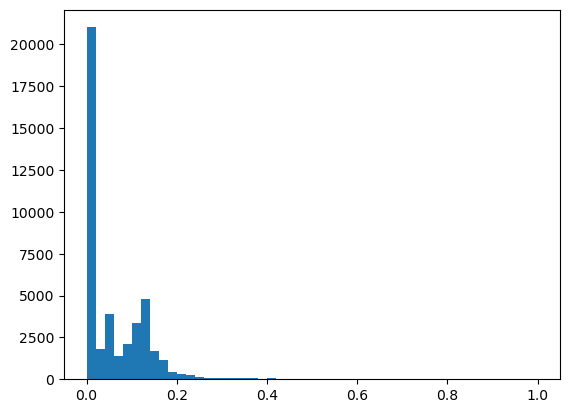

In [163]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)

(array([  20.,   60.,   29.,   97.,   70.,   84.,  150.,   78.,  124.,
         170.,  152.,  208.,  199.,  228.,  242.,  276.,  300.,  335.,
         339.,  376.,  412.,  421.,  505.,  505.,  575.,  583.,  614.,
         735.,  756.,  812.,  840.,  942.,  959., 1137., 1217., 1418.,
        1431., 1580., 1732., 1850., 2003., 2151., 2123., 2376., 2447.,
        2693., 2366., 2115., 1527.,  874.]),
 array([4.3800000e-04, 2.0429240e-02, 4.0420480e-02, 6.0411720e-02,
        8.0402960e-02, 1.0039420e-01, 1.2038544e-01, 1.4037668e-01,
        1.6036792e-01, 1.8035916e-01, 2.0035040e-01, 2.2034164e-01,
        2.4033288e-01, 2.6032412e-01, 2.8031536e-01, 3.0030660e-01,
        3.2029784e-01, 3.4028908e-01, 3.6028032e-01, 3.8027156e-01,
        4.0026280e-01, 4.2025404e-01, 4.4024528e-01, 4.6023652e-01,
        4.8022776e-01, 5.0021900e-01, 5.2021024e-01, 5.4020148e-01,
        5.6019272e-01, 5.8018396e-01, 6.0017520e-01, 6.2016644e-01,
        6.4015768e-01, 6.6014892e-01, 6.8014016e-01, 7.0

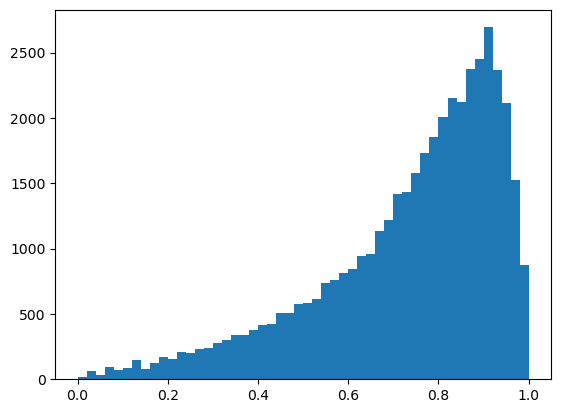

In [164]:
plt.hist(loan_data_defaults['CCF'], bins = 50)

In [165]:
#To model recovery rate - We will follow two stage approach for recovery rate
#1. Recovery rate >= 0 ------ Logistic Regression
#2. If Recovery rate >= 0, how much exactly it is ------- Linear Regression

In [166]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)

In [167]:
#To model ccf - We wil use MLRM

## LGD Model

In [168]:
##Splitting Data
from sklearn.model_selection import train_test_split

In [169]:
X_train_s_1, X_test_s_1, y_train_s_1, y_test_s_1 = train_test_split(
    loan_data_defaults.drop(['CCF', 'recovery_rate_0_1', 'recovery_rate', 'good_bad'], axis = 1),
    loan_data_defaults['recovery_rate_0_1'], random_state = 42, test_size = 0.2)

In [170]:
#Preparing inputs
features_all = [
'grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim'
]

In [171]:
#Reference categories
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [172]:
X_train_s_1 = X_train_s_1[features_all]

In [173]:
X_train_s_1 = X_train_s_1.drop(features_reference_cat, axis = 1)

### Estimating the model

In [174]:
import numpy as np
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)
    
    def fit(self, X, y, batch_size=1000):
        # Ensure X is a numpy array with float64 type
        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y, dtype=np.float64)
        
        self.model.fit(X, y)
        
        p = X.shape[1]  # Number of features
        F_ij = np.zeros((p, p), dtype=np.float64)  # Fisher Information Matrix
        
        num_samples = X.shape[0]
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            X_batch = X[start:end]
            
            # Ensure batch is also float64
            X_batch = np.asarray(X_batch, dtype=np.float64)
            
            decision_function_batch = self.model.decision_function(X_batch)
            
            # Compute probabilities for batch
            exp_df_batch = np.exp(-decision_function_batch)
            prob_batch = exp_df_batch / (1 + exp_df_batch)**2
            prob_batch = np.reshape(prob_batch, (X_batch.shape[0], 1))
            W_batch = np.diagflat(prob_batch)
            
            # Compute XtW for the current batch and update Fisher Information Matrix
            XtW_batch = np.dot(X_batch.T, W_batch)
            F_ij += np.dot(XtW_batch, X_batch)
        
        # Inverse Fisher Information Matrix
        try:
            Cramer_Rao = np.linalg.inv(F_ij)
        except np.linalg.LinAlgError:
            # Use pseudoinverse if the matrix is singular
            Cramer_Rao = np.linalg.pinv(F_ij)
        
        # Standard errors of the coefficients
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        
        # Z-scores
        z_scores = self.model.coef_[0] / sigma_estimates
        
        # Two-tailed p-values
        p_values = [stat.norm.sf(abs(z)) * 2 for z in z_scores]
        
        # Store results
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [175]:
reg_lgd_s_1 = LogisticRegression_with_p_values()
reg_lgd_s_1.fit(X_train_s_1, y_train_s_1)

In [176]:
feature_name = X_train_s_1.columns.values

In [177]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_lgd_s_1.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_lgd_s_1.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_lgd_s_1.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.061294e-04,NaN
1,grade:A,-1.294570e-05,9.998775e-01
2,grade:B,-7.870613e-05,9.990796e-01
3,grade:C,-1.524204e-04,9.981549e-01
4,grade:D,2.231187e-05,9.997407e-01
5,grade:E,1.680726e-05,9.998229e-01
6,grade:F,8.500352e-05,9.992205e-01
7,home_ownership:MORTGAGE,-4.046043e-05,9.987271e-01
8,home_ownership:NONE,1.033086e-06,9.999990e-01
9,home_ownership:OTHER,6.275662e-07,9.999987e-01


### Testing the Model

In [178]:
X_test_s_1 = X_test_s_1[features_all]

In [179]:
X_test_s_1 = X_test_s_1.drop(features_reference_cat, axis = 1)

In [180]:
y_hat_test_lgd_s_1 = reg_lgd_s_1.model.predict(X_test_s_1)

In [181]:
y_hat_test_lgd_s_1

array([1., 1., 0., ..., 1., 1., 1.])

In [182]:
y_hat_test_prob_lgd_s_1 = reg_lgd_s_1.model.predict_proba(X_test_s_1)

In [183]:
y_hat_test_prob_lgd_s_1

array([[0.39217854, 0.60782146],
       [0.38142617, 0.61857383],
       [0.53195363, 0.46804637],
       ...,
       [0.4807362 , 0.5192638 ],
       [0.42077803, 0.57922197],
       [0.47175814, 0.52824186]])

In [184]:
#Probabilities for recovery rate > 0
y_hat_test_prob_lgd_s_1 = y_hat_test_prob_lgd_s_1[:][:,1]

In [185]:
y_hat_test_prob_lgd_s_1

array([0.60782146, 0.61857383, 0.46804637, ..., 0.5192638 , 0.57922197,
       0.52824186])

### Accuracy of Stage 1 model

In [186]:
y_test_s_1_temp = y_test_s_1

In [187]:
y_test_s_1_temp.reset_index(drop = True, inplace = True)

In [188]:
df_actual_predicted_prob = pd.concat([y_test_s_1_temp, pd.DataFrame(y_hat_test_prob_lgd_s_1)], axis = 1)

In [189]:
df_actual_predicted_prob.columns = ['y_test_lgd_s1','y_hat_test_prob_lgd_s1']

In [190]:
df_actual_predicted_prob.index = X_test_s_1.index

In [191]:
df_actual_predicted_prob.head()

,y_test_lgd_s1,y_hat_test_prob_lgd_s1
178928,1,0.607821
69814,1,0.618574
101396,0,0.468046
463268,1,0.557697
253729,0,0.403007


### Accuracy of the model

In [192]:
tr = 0.5
df_actual_predicted_prob['y_hat_test_lgd_s1'] = np.where(df_actual_predicted_prob['y_hat_test_prob_lgd_s1'] > tr, 1, 0)

In [193]:
df_actual_predicted_prob.head()

,y_test_lgd_s1,y_hat_test_prob_lgd_s1,y_hat_test_lgd_s1
178928,1,0.607821,1
69814,1,0.618574,1
101396,0,0.468046,0
463268,1,0.557697,1
253729,0,0.403007,0


In [194]:
pd.crosstab(df_actual_predicted_prob['y_test_lgd_s1'],df_actual_predicted_prob['y_hat_test_lgd_s1'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,1017,2745
1,695,4191


In [195]:
confusion_matrix = pd.crosstab(df_actual_predicted_prob['y_test_lgd_s1'],df_actual_predicted_prob['y_hat_test_lgd_s1'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_prob.shape[0]

confusion_matrix

Predicted,0,1
Actual,,
0,0.117599,0.317414
1,0.080365,0.484621


In [196]:
accuracy_score = confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,1]
accuracy_score

0.6022201665124884

In [197]:
from sklearn.metrics import roc_curve, roc_auc_score

In [198]:
fpr, tpr, threshold = roc_curve(df_actual_predicted_prob['y_test_lgd_s1'], df_actual_predicted_prob['y_hat_test_prob_lgd_s1'])

Text(0.5, 1.0, 'ROC curve')

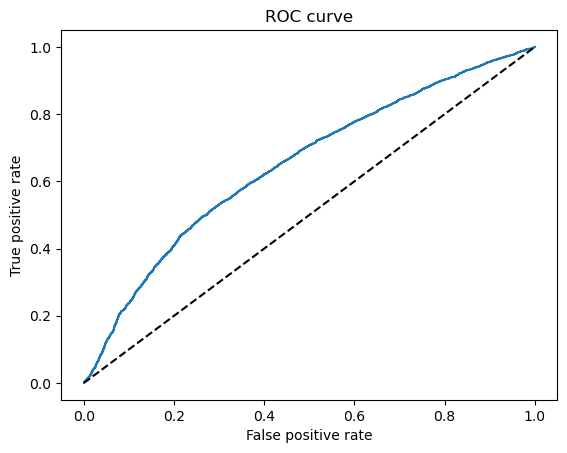

In [199]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [200]:
AUCROC = roc_auc_score(df_actual_predicted_prob['y_test_lgd_s1'], df_actual_predicted_prob['y_hat_test_prob_lgd_s1'])

In [201]:
AUCROC

0.6493851412415731

## Saving the Model

In [202]:
import pickle

In [203]:
pickle.dump(reg_lgd_s_1, open('reg_lgd_s1.sav', 'wb'))

# Stage 2 - LGD Model - MLRM

In [204]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]

In [205]:
X_train_s_2, X_test_s_2, y_train_s_2, y_test_s_2 = train_test_split(
    lgd_stage_2_data.drop(['CCF', 'recovery_rate_0_1', 'recovery_rate', 'good_bad'], axis = 1),
    lgd_stage_2_data['recovery_rate'], random_state = 42, test_size = 0.2)

In [206]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [207]:
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
import numpy as np
from scipy import stats

class LinearRegression(SklearnLinearRegression):
    def __init__(self, fit_intercept=True, copy_X=True, n_jobs=None, positive=False):
        # Initialize the parent class with all required parameters.
        super().__init__(fit_intercept=fit_intercept, copy_X=copy_X, n_jobs=n_jobs, positive=positive)

    def fit(self, X, y):
        # Call the fit method of the parent class
        super().fit(X, y)
        
        # Number of observations and predictors
        n, p = X.shape

        # Compute sum of squared errors
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / (n - p)
        
        # Compute standard errors of the coefficients
        try:
            se = np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))
        except np.linalg.LinAlgError:
            raise ValueError("Matrix inversion error: X.T @ X is likely singular")

        # Compute t-statistics for the coefficients
        self.t = self.coef_ / se
        
        # Compute p-values for the t-statistics
        self.p = 2 * (1 - stats.t.cdf(np.abs(self.t), df=n - p))
        
        return self

    @staticmethod
    def normalize_features(X):
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_normalized = scaler.fit_transform(X)
        return X_normalized


In [208]:
X_train_s_2 = X_train_s_2[features_all]

In [209]:
X_train_s_2 = X_train_s_2.drop(features_reference_cat, axis = 1)

In [210]:
reg_lgd_s2 = LinearRegression()
reg_lgd_s2.fit(X_train_s_2,y_train_s_2)

LinearRegression()

In [211]:
feature_name = X_train_s_2.columns.values

In [212]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_lgd_s2.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_lgd_s2.intercept_]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
t_values = reg_lgd_s2.t
# We take the result of the newly added method 't_values' and store it in a variable 't_values'.
t_values = np.append(np.nan,np.array(t_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['t_values'] = t_values
# Sorts the dataframe by index.
p_values = reg_lgd_s2.p
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

,Feature name,Coefficients,t_values,p_values
0,Intercept,2.406858e-01,NaN,NaN
1,grade:A,-6.826892e-02,-14.331672,0.000000e+00
2,grade:B,-5.083556e-02,-13.216179,0.000000e+00
3,grade:C,-3.748066e-02,-10.113073,0.000000e+00
4,grade:D,-2.717310e-02,-7.041142,1.970202e-12
5,grade:E,-1.315941e-02,-3.102979,1.918578e-03
6,grade:F,-5.260168e-03,-1.091950,2.748685e-01
7,home_ownership:MORTGAGE,2.832212e-03,1.877221,6.050271e-02
8,home_ownership:NONE,1.459035e-01,3.914432,9.092582e-05
9,home_ownership:OTHER,-9.475922e-03,-0.462549,6.436926e-01


### Model Validation - Stage 2

In [213]:
X_test_s_2 = X_test_s_2[features_all]

In [214]:
X_test_s_2 = X_test_s_2.drop(features_reference_cat, axis = 1)

In [215]:
X_test_s_2.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [216]:
y_hat_test_lgd_s_2 = reg_lgd_s2.predict(X_test_s_2)

In [217]:
lgd_targets_s2_temp = y_test_s_2

In [218]:
lgd_targets_s2_temp = lgd_targets_s2_temp.reset_index(drop = True)

In [219]:
pd.concat([lgd_targets_s2_temp, pd.DataFrame(y_hat_test_lgd_s_2)], axis = 1).corr()

,recovery_rate,0
recovery_rate,1.000000,0.307996
0,0.307996,1.000000


<Axes: xlabel='recovery_rate', ylabel='Density'>

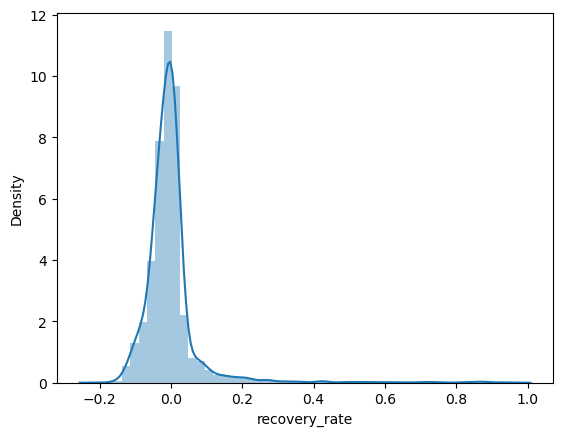

In [220]:
sns.distplot(y_test_s_2 - y_hat_test_lgd_s_2)

In [221]:
#Saving the stage 2 model
pickle.dump(reg_lgd_s2, open('reg_lgd_s2.sav','wb'))

### Combining Stage 1 and 2

In [222]:
y_hat_test_lgd_stage_2_all = reg_lgd_s2.predict(X_test_s_1)

In [223]:
y_hat_test_lgd_stage_2_all

array([0.1193906 , 0.09605635, 0.13367631, ..., 0.12078611, 0.11587422,
       0.15667447])

In [225]:
#Every observation classified as 0 by the stage 1 logistic regression model has estimated recovery rate of 0
#Every observation classified as 1 by the stage 1 logistic regression model has estimated recovery rate of stage 2 mlrm model

In [226]:
y_hat_test_lgd = y_hat_test_lgd_s_1 * y_hat_test_lgd_stage_2_all

In [228]:
pd.DataFrame(y_hat_test_lgd).describe().T

,count,mean,std,min,25%,50%,75%,max
0,8648.0,0.086308,0.049819,-0.007634,0.06236,0.100542,0.122637,0.236973


In [230]:
#min value is negative which is not intiutive
#Flooring recovery rate to 0

In [231]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)

In [232]:
pd.DataFrame(y_hat_test_lgd).describe().T

,count,mean,std,min,25%,50%,75%,max
0,8648.0,0.08631,0.049815,0.0,0.06236,0.100542,0.122637,0.236973


# EAD Model

### Model Development

In [233]:
#dependent variable: CCF

##CCF can be defined as the proportion of amount that is outstanding out of original amount of loan, when borrower defaulted. 

In [240]:
X_train_ead, X_test_ead, y_train_ead, y_test_ead = train_test_split(
    loan_data_defaults.drop(['good_bad', 'recovery_rate', 'recovery_rate_0_1', 'CCF'], axis = 1),
    loan_data_defaults['CCF'], random_state = 42, test_size = 0.2
)

In [241]:
#Selecting only required variables
X_train_ead = X_train_ead[features_all]

In [242]:
#Dropping reference variable for categorical variable
X_train_ead = X_train_ead.drop(features_reference_cat, axis = 1)

In [243]:
reg_ead = LinearRegression()

In [244]:
reg_ead.fit(X_train_ead, y_train_ead)

LinearRegression()

In [245]:
feature_name = X_train_ead.columns.values

In [246]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
t_values = reg_ead.t
# We take the result of the newly added method 't_values' and store it in a variable 't_values'.
t_values = np.append(np.nan,np.array(t_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['t_values'] = t_values
# Sorts the dataframe by index.
p_values = reg_ead.p
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

,Feature name,Coefficients,t_values,p_values
0,Intercept,1.109746e+00,NaN,NaN
1,grade:A,-3.030033e-01,-44.058986,0.000000e+00
2,grade:B,-2.364277e-01,-42.322578,0.000000e+00
3,grade:C,-1.720232e-01,-31.696208,0.000000e+00
4,grade:D,-1.198470e-01,-21.147987,0.000000e+00
5,grade:E,-6.768713e-02,-10.820215,0.000000e+00
6,grade:F,-2.045907e-02,-2.846074,4.428795e-03
7,home_ownership:MORTGAGE,-6.343341e-03,-3.007903,2.632464e-03
8,home_ownership:NONE,-5.539065e-03,-0.085464,9.318931e-01
9,home_ownership:OTHER,-2.426052e-03,-0.083340,9.335820e-01


### Model Validation

In [247]:
X_test_ead = X_test_ead[features_all]

In [248]:
X_test_ead = X_test_ead.drop(features_reference_cat, axis = 1)

In [249]:
y_hat_test_ead = reg_ead.predict(X_test_ead)

In [250]:
ead_targets_test_temp = y_test_ead

In [251]:
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop = True)

In [253]:
pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)], axis = 1).corr()

,CCF,0
CCF,1.000000,0.530654
0,0.530654,1.000000


<Axes: xlabel='CCF', ylabel='Density'>

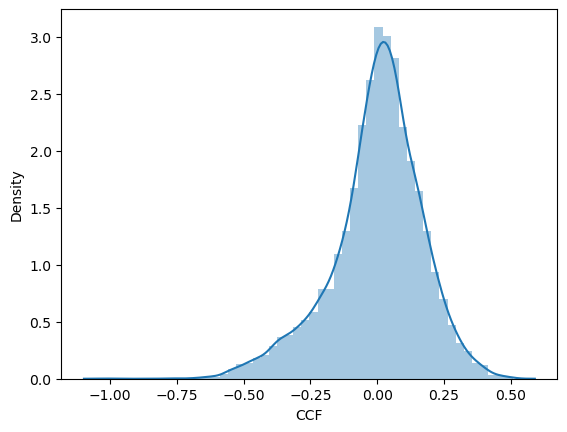

In [254]:
sns.distplot(y_test_ead - y_hat_test_ead)

In [255]:
pd.DataFrame(y_hat_test_ead).describe().T

,count,mean,std,min,25%,50%,75%,max
0,8648.0,0.736013,0.105194,0.384774,0.661553,0.73175,0.810625,1.161088


In [257]:
#Observation: CCF > 1
#Need further investigation, there could be multiple reasons:
#Limit has been increased in between
#Interest rate and penalties has been added because of non-payment

# Expected Loss

### EL = PD * LGD * EAD

In [281]:
##LGD

In [260]:
loan_data_preprocessed['mths_since_last_delinq'].fillna(0, inplace = True)
loan_data_preprocessed['mths_since_last_record'].fillna(0, inplace = True)

In [261]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed[features_all]

In [263]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed_lgd_ead.drop(features_reference_cat, axis = 1)

In [264]:
#LGD = 1 - recovery rate

In [265]:
loan_data_preprocessed['recovery_rate_s_1'] = reg_lgd_s_1.model.predict(
    loan_data_preprocessed_lgd_ead
)

In [271]:
loan_data_preprocessed['recovery_rate_s_2'] = reg_lgd_s2.predict(
    loan_data_preprocessed_lgd_ead
)

In [272]:
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_s_1'] * loan_data_preprocessed['recovery_rate_s_2']

In [273]:
loan_data_preprocessed['recovery_rate'] = np.where(
    loan_data_preprocessed['recovery_rate'] < 0, 0, loan_data_preprocessed['recovery_rate']
)

loan_data_preprocessed['recovery_rate'] = np.where(
    loan_data_preprocessed['recovery_rate'] > 1, 1, loan_data_preprocessed['recovery_rate']
)

In [274]:
loan_data_preprocessed['LGD'] = 1 - loan_data_preprocessed['recovery_rate']

In [276]:
loan_data_preprocessed['LGD'].describe()

count    466285.000000
mean          0.921500
std           0.057370
min           0.659786
25%           0.874305
50%           0.900328
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

In [283]:
##EAD

In [277]:
loan_data_preprocessed['CCF'] = reg_ead.predict(loan_data_preprocessed_lgd_ead)

In [278]:
loan_data_preprocessed['CCF'] = np.where(
    loan_data_preprocessed['CCF'] < 0, 0, loan_data_preprocessed['CCF']
)

loan_data_preprocessed['CCF'] = np.where(
    loan_data_preprocessed['CCF'] > 1, 1, loan_data_preprocessed['CCF']
)

#### EAD = CCF * funded amount

In [279]:
loan_data_preprocessed['EAD'] = loan_data_preprocessed['CCF'] * loan_data_preprocessed['funded_amnt']

In [280]:
loan_data_preprocessed['EAD'].describe()

count    466285.000000
mean      10814.846760
std        6935.184562
min         190.347372
25%        5495.101413
50%        9208.479591
75%       14692.844549
max       35000.000000
Name: EAD, dtype: float64

In [284]:
##PD

In [285]:
X_train_loan_data = pd.read_csv('X_train_loan_data.csv')
X_test_loan_data = pd.read_csv('X_test_loan_data.csv')

In [297]:
loan_data_inputs_pd = pd.concat([X_train_loan_data, X_test_loan_data], axis = 0)

In [298]:
loan_data_inputs_pd.shape

(466285, 316)

In [299]:
loan_data_inputs_pd.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,dti:22.4-35,dti:>35,mths_since_last_record_factor,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
0,427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,...,0,0,NaN,1,0,0,0,0,0,0
1,206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,...,0,0,NaN,1,0,0,0,0,0,0
2,136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,...,0,0,NaN,1,0,0,0,0,0,0
3,412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,...,0,0,NaN,1,0,0,0,0,0,0
4,36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,...,1,0,NaN,1,0,0,0,0,0,0


In [300]:
#We need to match rows for all 3 components
loan_data_inputs_pd = loan_data_inputs_pd.set_index('Unnamed: 0')

In [301]:
loan_data_inputs_pd.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:22.4-35,dti:>35,mths_since_last_record_factor,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,0,0,NaN,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,NaN,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,NaN,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,NaN,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,1,0,NaN,1,0,0,0,0,0,0


In [323]:
features_all_pd = [
'grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:Rent_Other_None_Any',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'month_since_earliest_cr_line:<140',
'month_since_earliest_cr_line:141-164',
'month_since_earliest_cr_line:165-247',
'month_since_earliest_cr_line:248-270',
'month_since_earliest_cr_line:271-352',
'month_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]

In [324]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories_pd = [
        'grade:G',
        'home_ownership:Rent_Other_None_Any',
        'addr_state:ND_NE_IA_NV_FL_HI_AL',
        'verification_status:Verified',
        'purpose:educ__sm_b__wedd__ren_en__mov__house',
        'initial_list_status:f',
        'term:60',
        'emp_length_int:0',
        'mths_since_issue_d:>84',
        'int_rate:>20.281',
        'month_since_earliest_cr_line:<140',
        'inq_last_6mths:>6',
        'pub_rec:0-2',
        'total_acc:<=27',
        'acc_now_delinq:0',
        'annual_inc:<20K',
        'mths_since_last_delinq:0-3',
        'mths_since_last_record:0-2']

In [325]:
loan_data_inputs_pd_temp = loan_data_inputs_pd[features_all_pd]

In [326]:
loan_data_inputs_pd_temp.shape

(466285, 76)

In [304]:
import pickle

In [306]:
reg_pd = pickle.load(open('pd_model.sav', 'rb'))

In [334]:
#PD as a new laon column
loan_data_inputs_pd['PD'] = reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[:][:,1]

In [335]:
loan_data_inputs_pd['PD'].head()

Unnamed: 0
427211    0.053709
206088    0.062083
136020    0.037114
412305    0.108062
36159     0.038455
Name: PD, dtype: float64

In [337]:
loan_data_inputs_pd['PD'].describe()

count    466285.000000
mean          0.092267
std           0.063366
min           0.004858
25%           0.046599
50%           0.074669
75%           0.119928
max           0.518047
Name: PD, dtype: float64

In [340]:
loan_data_preprocessed_new = pd.concat([loan_data_preprocessed, loan_data_inputs_pd], axis = 1)

In [341]:
loan_data_preprocessed_new['EL'] = loan_data_preprocessed_new['PD'] * loan_data_preprocessed_new['LGD'] * loan_data_preprocessed_new['EAD']

In [342]:
loan_data_preprocessed_new['EL'].describe()

count    466285.000000
mean       1060.587923
std        1269.176551
min           1.928970
25%         279.059317
50%         567.127932
75%        1326.704613
max       13923.320110
Name: EL, dtype: float64

In [344]:
loan_data_preprocessed_new[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL']].head()

,funded_amnt,funded_amnt,PD,LGD,EAD,EL
0,5000,5000,0.046978,0.913729,2949.608449,126.612593
1,2500,2500,0.069104,0.915482,1944.433378,123.011087
2,2400,2400,0.061029,0.919484,1579.934302,88.658475
3,10000,10000,0.048762,0.904924,6606.559612,291.522712
4,3000,3000,0.039851,0.911453,2124.631667,77.171766


In [345]:
#Total expected loss on portfolio level
loan_data_preprocessed_new['EL'].sum()

494536239.5440697

In [347]:
#Total expected loss on portfolio as a proportion of funded amount
loan_data_preprocessed_new['EL'].sum() / loan_data_preprocessed_new['funded_amnt'].sum()

funded_amnt    0.07421
funded_amnt    0.07421
dtype: float64